Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [7]:
!pip install chardet
import chardet
with open('/content/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
sc = pd.read_csv('/content/spam.csv', encoding=encoding)
sc

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
sc.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
sc.shape

(5572, 5)

Data Cleaning

In [10]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
sc.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
sc.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [22]:
sc.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [23]:
sc

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
sc['target'] = encoder.fit_transform(sc['target'])

In [28]:
sc.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
sc.duplicated().sum()

403

In [32]:
sc= sc.drop_duplicates(keep='first')
sc.duplicated().sum()

0

Exploratory Data Analysis

In [34]:
sc['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

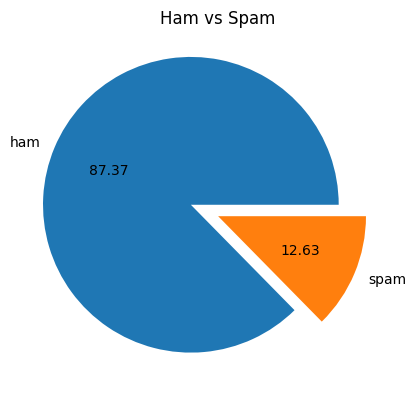

In [90]:
plt.pie(sc['target'].value_counts(), labels=['ham','spam'], explode=explode, autopct="%0.2f")
explode = [.2, 0]
plt.title("Ham vs Spam")
plt.show()

In [36]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
sc['num_characters']= sc['text'].apply(len)
sc['num_sentences']= sc['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sc['num_words']= sc['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [41]:
sc.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [44]:
sc[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [48]:
sc[sc['target'] == 0] [['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [49]:
sc[sc['target'] == 1] [['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


Visualizations

<Axes: xlabel='num_characters', ylabel='Count'>

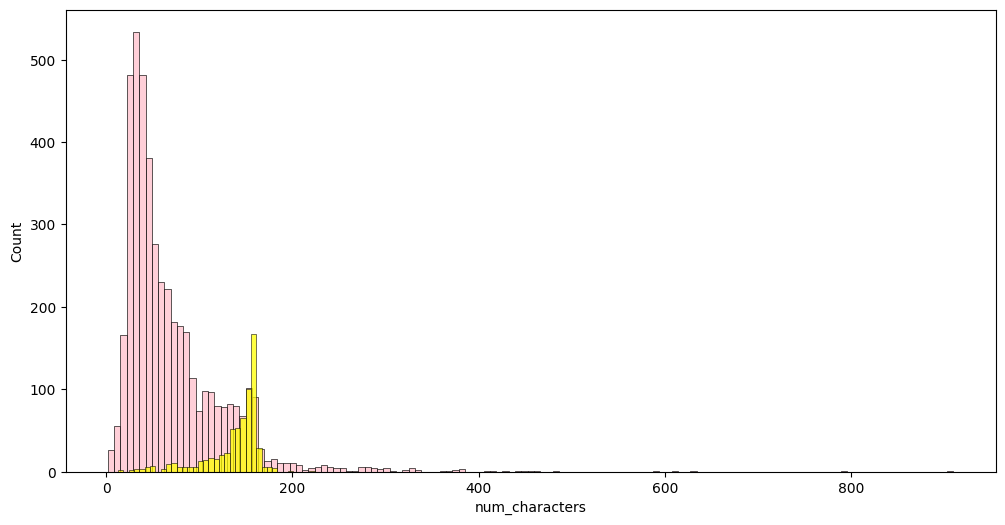

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(sc[sc['target']==0]['num_characters'], color='pink')
sns.histplot(sc[sc['target']==1]['num_characters'], color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

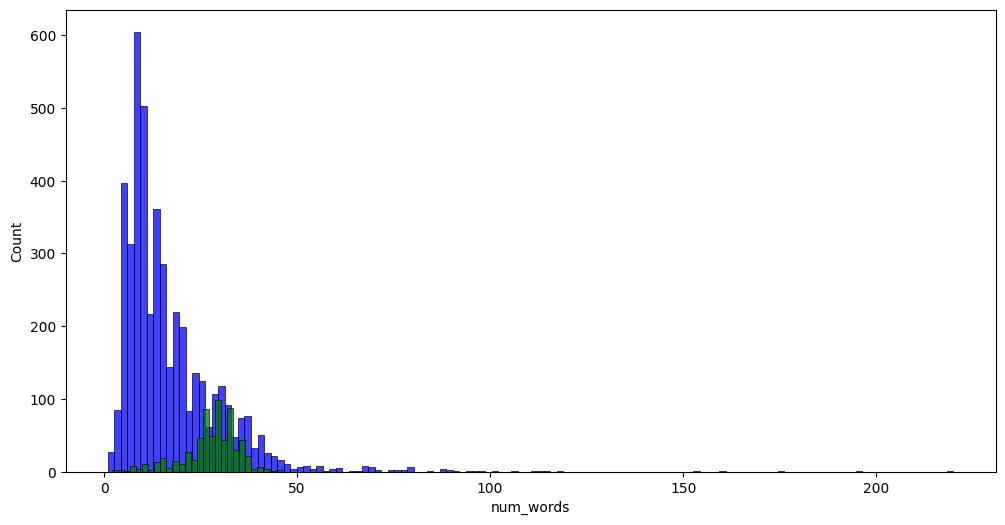

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(sc[sc['target']==0]['num_words'], color='blue')
sns.histplot(sc[sc['target']==1]['num_words'], color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

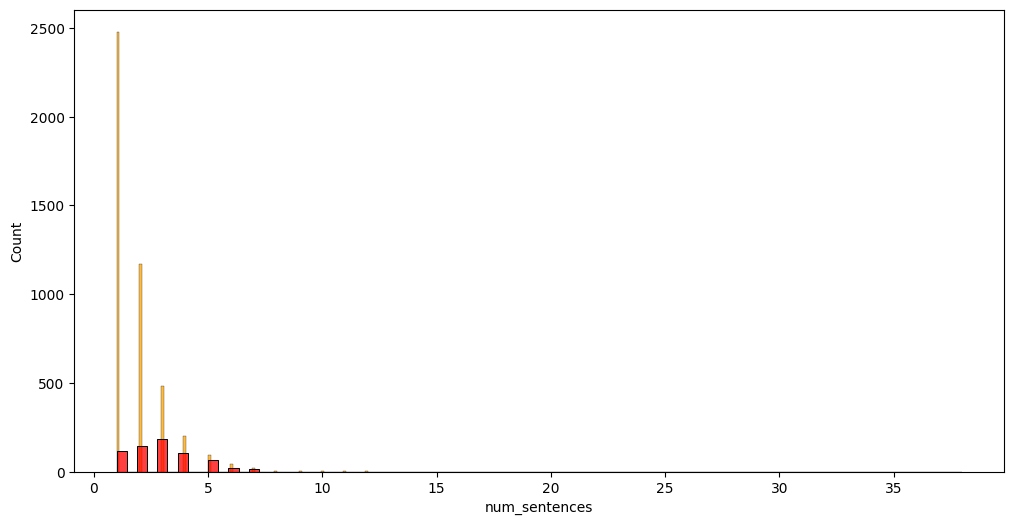

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(sc[sc['target']==0]['num_sentences'], color='orange')
sns.histplot(sc[sc['target']==1]['num_sentences'], color='red')

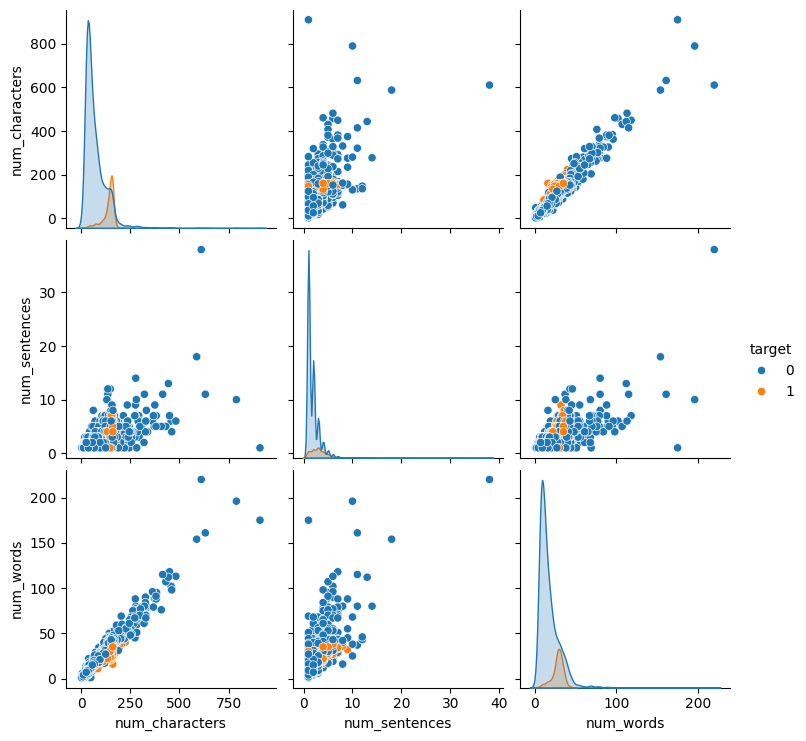

In [57]:
sns.pairplot(sc,hue='target')

<ipython-input-59-7d2b7ad5a9fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sc.corr(), annot=True)


<Axes: >

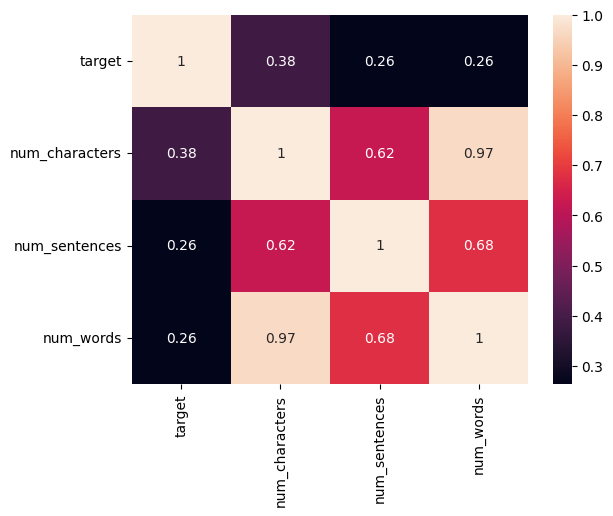

In [59]:
sns.heatmap(sc.corr(), annot=True)

Data Preprocessing

In [60]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

def transformTexts(text):
    text = text.lower()
    #tokenizing the text based on the words in the text
    text = nltk.word_tokenize(text)
    #including all those characters which are alphabet or number
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)

    #storing the value of y into the vaiable text
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    ps = PorterStemmer()

    for i in text:
        y.append(ps.stem(i))

    text = y[:]
    y.clear()

    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [65]:
transformed_text= transformTexts('Hi, how are you? Did you eat my food? And if you are coming for dancing tell me, I danced very well last time')
print(transformed_text)

hi eat food come danc tell danc well last time


In [68]:
sc['text'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [73]:
sc['transformed_text'] = sc['text'].apply(transformTexts)

In [72]:
sc.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah n't think goe usf live around though


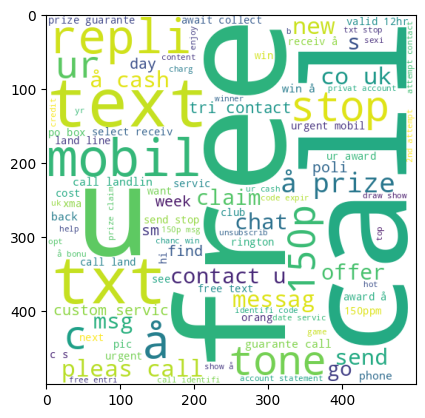

In [78]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(sc[sc['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

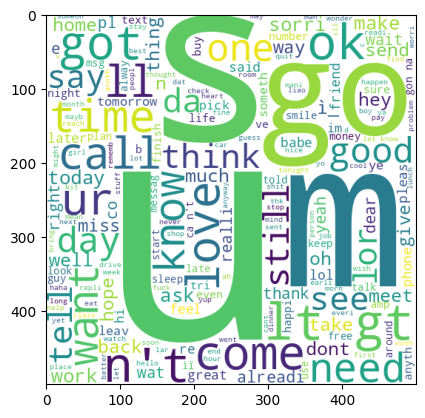

In [79]:
ham_wc = wc.generate(sc[sc['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [84]:
spam_corpus = []
for msg in sc[sc['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

#same for the ham messages
ham_corpus = []
for msg in sc[sc['target']==0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [87]:
len(spam_corpus)

11083

In [88]:
len(ham_corpus)

196685

In [82]:
spam_corpus_sc = pd.DataFrame(spam_corpus)
spam_corpus_sc.head()

,0
0,free
1,entri
2,2
3,wkli
4,comp


Model Selection

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
X = tfidf.fit_transform(sc['transformed_text']).toarray()

In [94]:
X.shape

(5169, 3000)

In [96]:
y= sc['target'].values

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [98]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [100]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [101]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[789 107]
 [ 22 116]]
0.5201793721973094


In [106]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [107]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [110]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [113]:
tfidf = TfidfVectorizer(max_features = 3000) #our model is giving best accuracy for 3000 features and the precision stays 1
X_tf = tfidf.fit_transform(sc['transformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size =0.2, random_state = 2)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [114]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9504132231404959
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9682539682539683
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.946236559139785
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.973888,1.000000
5,RF,0.976789,0.983051
0,SVC,0.976789,0.975000
7,ETC,0.980658,0.968254
9,xgb,0.973888,0.958678
4,LR,0.957447,0.951923
6,AdaBoost,0.971954,0.950413
8,GBDT,0.946809,0.946237
3,DT,0.930368,0.830000


In [116]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.976789
4,ETC,Accuracy,0.980658
5,xgb,Accuracy,0.973888
6,LR,Accuracy,0.957447
7,AdaBoost,Accuracy,0.971954
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.930368


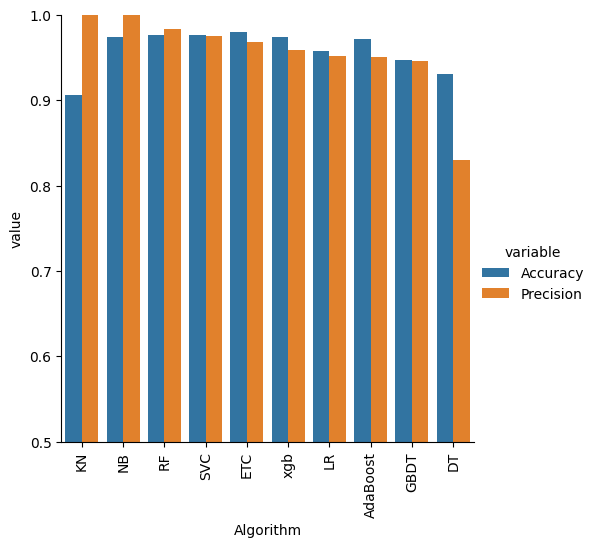

In [117]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#In this problem, this is to classify that sms is spam or not
 in given context our best metric would be precision score (it can show the spam mails are classified properly or not) and than accuracy score
#so for KNN and the Multinominal Navibayes the Precision are good
#But for the accuracy Multinomial navie Bayes is giving best accuracy so we will consider the multinominal classifier

Make Pipeline

In [118]:
sc

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah n't think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15,piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,125,1,27,guy bitch act like 'd interest buy someth els ...


In [119]:
X = sc['transformed_text']
y = sc['target']

In [120]:
tfidf = TfidfVectorizer(max_features = 3000) #our model is giving best accuracy for 3000 features and the precision stays 1
X_tf = tfidf.fit_transform(sc['transformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [121]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train_tf)

MultinomialNB()

In [128]:
def transformed_text(X_pred):
    # Code to transform the text here
    return transformed_text

In [132]:
def predict(X_pred):
    X_pred = [X_pred]
    X_tf = tfidf.transform(X_pred).toarray()  # Use transform instead of fit_transform
    predictions = mnb.predict(X_tf)
    if predictions == 1:
        print("The Message is Spam")
    else:
        print("The Message is not spam")

In [133]:
X_pred = input('Enter the Message: ')
predict(X_pred)

Enter the Message: hey katie its urgent
The Message is not spam
